In [418]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import requests
import time
import random
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import warnings

Step 1: Data Acquired and Uploaded to GitHub

Step 2: Outdoor data acquired and uploaded to GitHub

In [419]:
myindata = pd.read_csv(r'C:\Users\pomar\OneDrive\Documents\GitHub\Engin11_Ryan_Omar2023\lab5+HW4\feb172023insidedata.csv')
myoutdata = pd.read_csv(r'C:\Users\pomar\OneDrive\Documents\GitHub\Engin11_Ryan_Omar2023\lab5+HW4\feb242023outsidedata.csv')
otherindata = pd.read_csv(r'C:\Users\pomar\OneDrive\Documents\GitHub\Engin11_Ryan_Omar2023\lab5+HW4\otherinside.csv')
otheroutdata = pd.read_csv(r'C:\Users\pomar\OneDrive\Documents\GitHub\Engin11_Ryan_Omar2023\lab5+HW4\otheroutside.csv')
myindata = myindata.replace(np.nan,1)
myoutdata = myoutdata.replace(np.nan,1)

In [420]:
#Preliminary tests to understand the Data Frames

myindata.describe()

,time,Concentration Units (Standard) PM 1.0,Concentration Units (Standard) PM 2.5,Concentration Units (Standard) PM 10.0,temperature,gas,pressure,humidity,altitude,Unnamed: 9
count,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,1.676678e+09,0.500000,1.043333,1.263333,22.680598,52721.303333,1006.457452,16.162533,56.706717,1.0
std,1.034165e+02,0.500835,0.629372,0.771994,0.104192,11435.722576,0.011967,0.173058,0.100173,0.0
min,1.676678e+09,0.000000,0.000000,0.000000,22.190742,8369.000000,1006.418684,15.900621,56.477419,1.0
25%,1.676678e+09,0.000000,1.000000,1.000000,22.638252,47063.750000,1006.448725,16.075176,56.640534,1.0
50%,1.676678e+09,0.500000,1.000000,1.000000,22.717207,55953.500000,1006.456368,16.128138,56.715787,1.0
75%,1.676678e+09,1.000000,1.000000,2.000000,22.758711,61681.750000,1006.465358,16.183109,56.779769,1.0
max,1.676678e+09,1.000000,2.000000,3.000000,22.772969,65672.000000,1006.484843,16.964390,57.031248,1.0


In [421]:
otherindata.describe()

,Unnamed: 0,time,temp,gas,humidity,pressure,altitude,PM 1.0,PM 2.5,PM10
count,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.0,252.0,252.0
mean,125.500000,1.676679e+09,31.429795,196815.083333,7.254070,1006.771460,54.078436,0.0,1.0,1.0
std,72.890329,8.682269e+01,0.309319,40888.186733,0.560854,0.011128,0.093131,0.0,0.0,0.0
min,0.000000,1.676678e+09,30.802266,23205.000000,6.787203,1006.742724,53.807074,0.0,1.0,1.0
25%,62.750000,1.676679e+09,31.176582,183774.000000,6.890436,1006.763730,54.020268,0.0,1.0,1.0
50%,125.500000,1.676679e+09,31.451582,210468.000000,7.153018,1006.771383,54.079078,0.0,1.0,1.0
75%,188.250000,1.676679e+09,31.752461,226100.500000,7.353035,1006.778411,54.143130,0.0,1.0,1.0
max,251.000000,1.676679e+09,31.821602,236917.000000,9.928704,1006.803885,54.318931,0.0,1.0,1.0


In [422]:
print(myindata)

           time  Concentration Units (Standard) PM 1.0  \
0    1676677883                                      0   
1    1676677885                                      0   
2    1676677886                                      0   
3    1676677887                                      1   
4    1676677888                                      1   
..          ...                                    ...   
295  1676678235                                      0   
296  1676678236                                      1   
297  1676678237                                      0   
298  1676678239                                      0   
299  1676678240                                      0   

     Concentration Units (Standard) PM 2.5  \
0                                        2   
1                                        2   
2                                        2   
3                                        2   
4                                        2   
..                         

In [423]:
print(otherindata)

     Unnamed: 0          time       temp     gas  humidity     pressure  \
0             0  1.676678e+09  30.802266  129708  7.740557  1006.795362   
1             1  1.676678e+09  30.821016   23205  7.698012  1006.791962   
2             2  1.676679e+09  30.877852   32992  7.646905  1006.782700   
3             3  1.676679e+09  30.928828   42786  7.586103  1006.779938   
4             4  1.676679e+09  30.974141   52109  7.534725  1006.776880   
..          ...           ...        ...     ...       ...          ...   
247         247  1.676679e+09  31.763008  235237  6.815597  1006.757019   
248         248  1.676679e+09  31.763594  233089  6.815610  1006.765095   
249         249  1.676679e+09  31.764766  235237  6.810886  1006.766993   
250         250  1.676679e+09  31.766328  234241  6.806170  1006.764178   
251         251  1.676679e+09  31.767891  236917  6.796704  1006.768491   

      altitude  PM 1.0  PM 2.5  PM10  
0    53.878403       0       1     1  
1    53.906860       

In [424]:
#Creating all the Data Frames for my groups indoor and outdoor data for later steps

temp_myout = myoutdata.iloc[:,[0,4]]
gas_myout = myoutdata.iloc[:,[0,5]]
humidity_myout = myoutdata.iloc[:,[0,7]]
pressure_myout = myoutdata.iloc[:,[0,6]]
altitude_myout = myoutdata.iloc[:,[0,8]]
pm1_myout = myoutdata.iloc[:,[0,1]]
pm2_myout = myoutdata.iloc[:,[0,2]]
pm10_myout = myoutdata.iloc[:,[0,3]]

temp_myin = myindata.iloc[:,[0,4]]
gas_myin = myindata.iloc[:,[0,5]]
humidity_myin = myindata.iloc[:,[0,7]]
pressure_myin = myindata.iloc[:,[0,6]]
altitude_myin = myindata.iloc[:,[0,8]]
pm1_myin = myindata.iloc[:,[0,1]]
pm2_myin = myindata.iloc[:,[0,2]]
pm10_myin = myindata.iloc[:,[0,3]]

# display(temp_myin)
# display(temp_myout)

Step 3:

Test plotting a frequency vs pressure and a Gaussian:

 Mean of the average reading = 56.71 +/- 0.10 


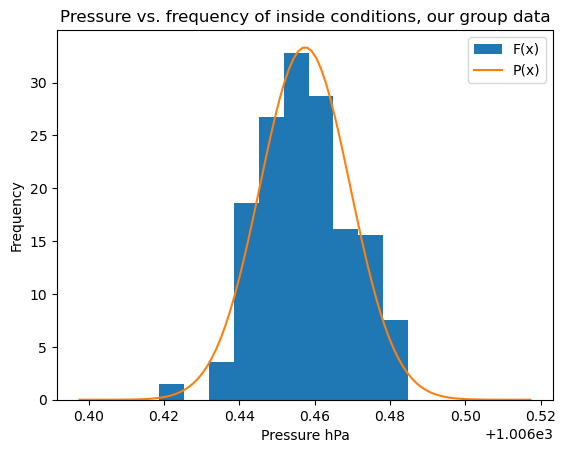

In [425]:
plt.hist(pressure_myin["pressure"], density=True, label="F(x)")
plt.title("Pressure vs. frequency of inside conditions, our group data")
plt.xlabel('Pressure hPa')
plt.ylabel('Frequency') 

print("\033[1m Mean of the average reading = {:.2f} +/- {:.2f} \033[0m".format(mu,sigma))

mu = (np.mean(pressure_myin["pressure"]))
# sigma = np.std((pressure_myout["pressure"]))
sigma = 0.011967
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
plt.plot(x,y, label= "P(x)")
plt.legend()

plt.show()


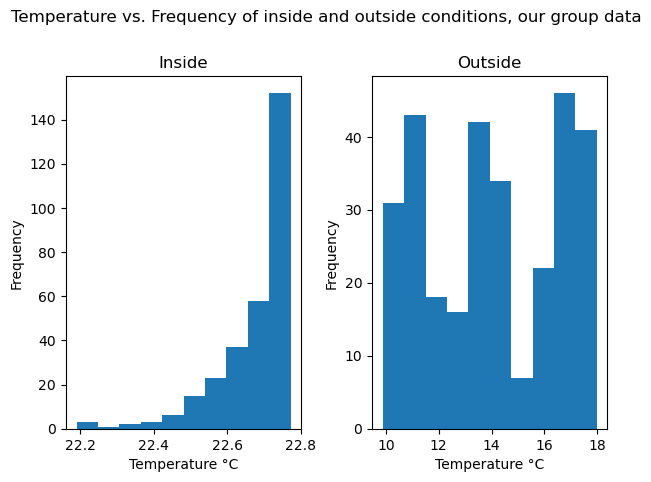

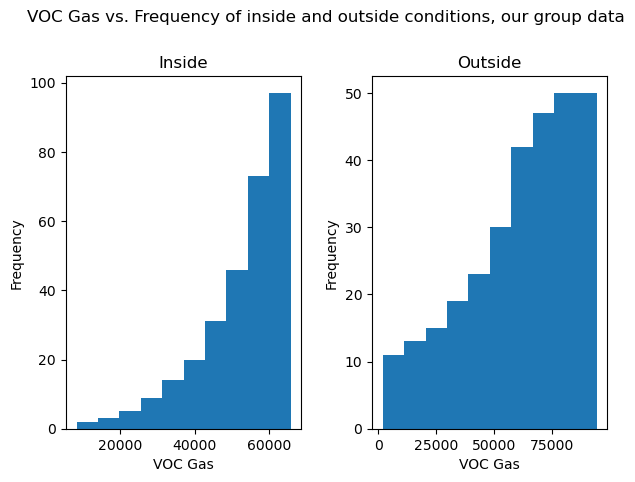

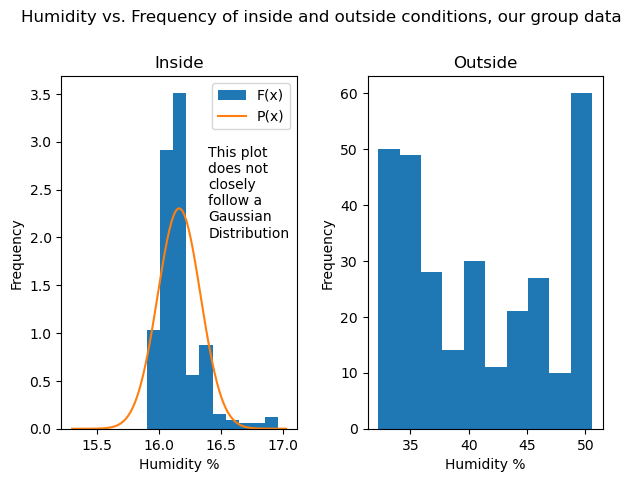

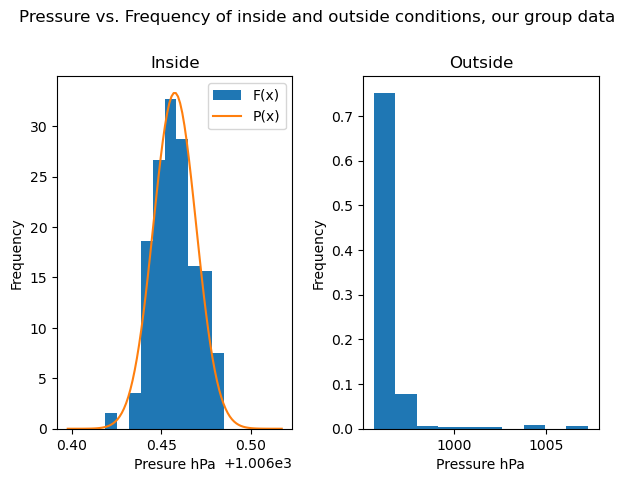

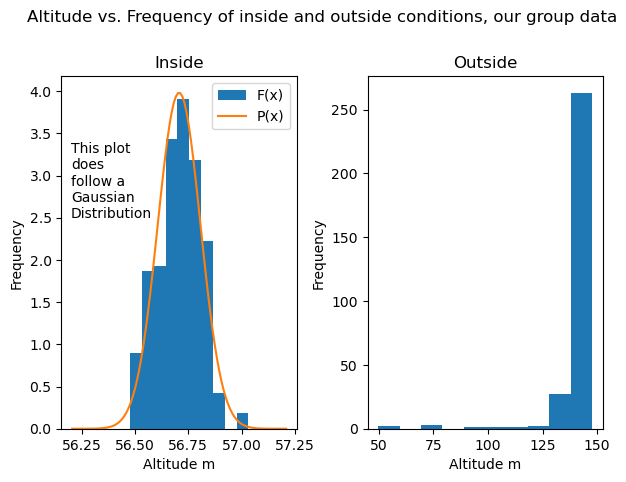

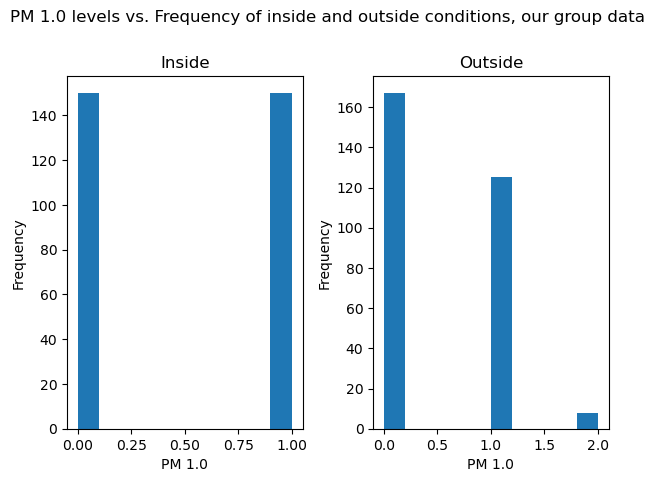

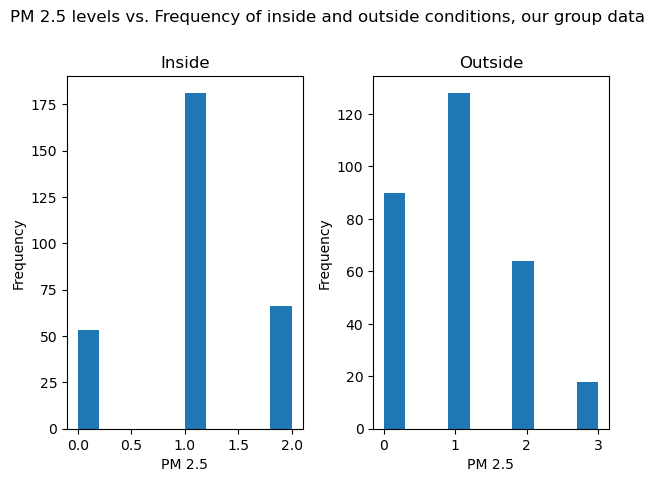

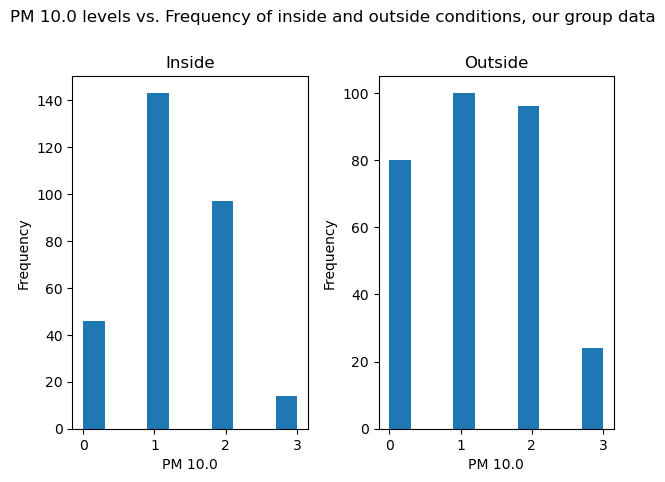

In [426]:

#My Group Temperature Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Temperature vs. Frequency of inside and outside conditions, our group data')
fig.tight_layout(pad = 2)

ax1.hist(temp_myin["temperature"])
ax2.hist(temp_myout["temperature"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('Temperature °C')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('Temperature °C')
ax2.set_ylabel('Frequency') 

plt.show()

#My Group Gas Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('VOC Gas vs. Frequency of inside and outside conditions, our group data')
fig.tight_layout(pad = 2)

ax1.hist(gas_myin["gas"])
ax2.hist(gas_myout["gas"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('VOC Gas')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('VOC Gas')
ax2.set_ylabel('Frequency') 

plt.show()

#My Group Humidity Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Humidity vs. Frequency of inside and outside conditions, our group data')
fig.tight_layout(pad = 2)

ax1.hist(humidity_myin["humidity"], density=True, label="F(x)")
ax2.hist(humidity_myout["humidity"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('Humidity %')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('Humidity %')
ax2.set_ylabel('Frequency') 

mu = 16.162533
sigma = 0.173058
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax1.plot(x,y, label = "P(x)")
ax1.legend()

ax1.text(16.4,2.0,'This plot\ndoes not\nclosely\nfollow a\nGaussian\nDistribution')
# ax1.annotate('This plot does not closely follow a Gaussian Distribution', xy=(16.6, 2.6), xytext=(16.5, 2.5),
#             arrowprops=dict(arrowstyle = "-", facecolor='black'))
# ax1.texts.remove(arrowprops)

plt.show()

#My Group Pressure Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Pressure vs. Frequency of inside and outside conditions, our group data')
fig.tight_layout(pad = 2)

ax1.hist(pressure_myin["pressure"], density=True, label = "F(x)")
ax2.hist(pressure_myout["pressure"], density=True)

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('Presure hPa')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('Pressure hPa')
ax2.set_ylabel('Frequency') 

mu = (np.mean(pressure_myin["pressure"]))
sigma = 0.011967
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax1.plot(x,y, label = "P(x)")
ax1.legend()

plt.show()

#My Group Altitude Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Altitude vs. Frequency of inside and outside conditions, our group data')
fig.tight_layout(pad = 2)

ax1.hist(altitude_myin["altitude"], density=True, label = "F(x)")
ax2.hist(altitude_myout["altitude"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('Altitude m')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('Altitude m')
ax2.set_ylabel('Frequency') 

mu = (np.mean(altitude_myin["altitude"]))
sigma = 0.100173
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax1.plot(x,y, label = "P(x)")
ax1.legend()

ax1.text(56.2,2.5,'This plot\ndoes\nfollow a\nGaussian\nDistribution')

plt.show()

#My Group PM 1.0 Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PM 1.0 levels vs. Frequency of inside and outside conditions, our group data')
fig.tight_layout(pad = 2)

ax1.hist(pm1_myin["Concentration Units (Standard) PM 1.0"])
ax2.hist(pm1_myout["Concentration Units (Standard) PM 1.0"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('PM 1.0')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('PM 1.0')
ax2.set_ylabel('Frequency') 

plt.show()

#My Group PM 2.5 Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PM 2.5 levels vs. Frequency of inside and outside conditions, our group data')
fig.tight_layout(pad = 2)

ax1.hist(pm2_myin["Concentration Units (Standard) PM 2.5"])
ax2.hist(pm2_myout["Concentration Units (Standard) PM 2.5"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('PM 2.5')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('PM 2.5')
ax2.set_ylabel('Frequency') 

plt.show()

#My Group PM 10.0 Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PM 10.0 levels vs. Frequency of inside and outside conditions, our group data')
fig.tight_layout(pad = 2)

ax1.hist(pm10_myin["Concentration Units (Standard) PM 10.0"])
ax2.hist(pm10_myout["Concentration Units (Standard) PM 10.0"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('PM 10.0')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('PM 10.0')
ax2.set_ylabel('Frequency') 

plt.show()

Step 4:

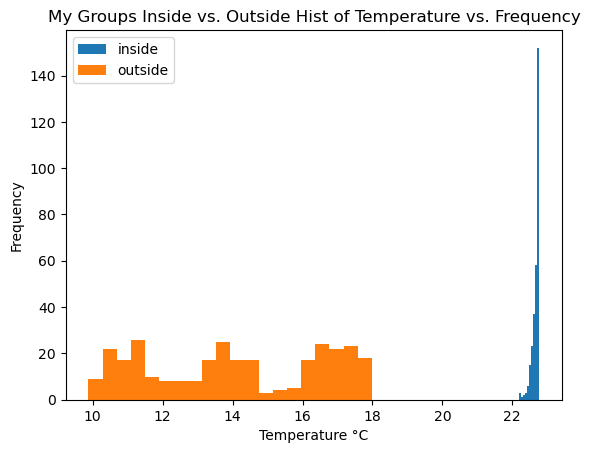

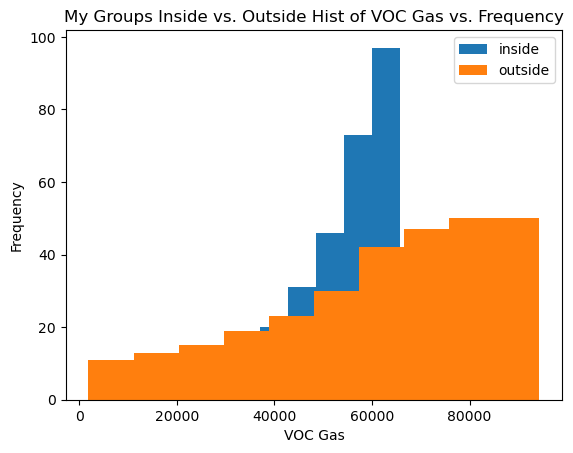

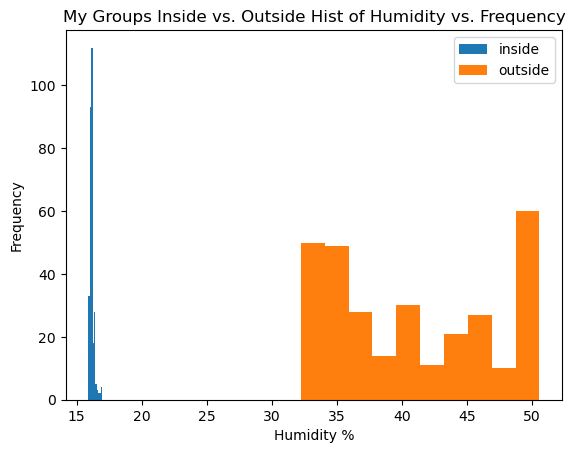

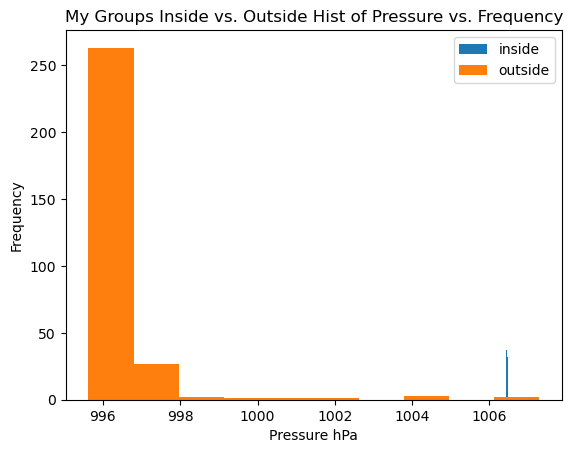

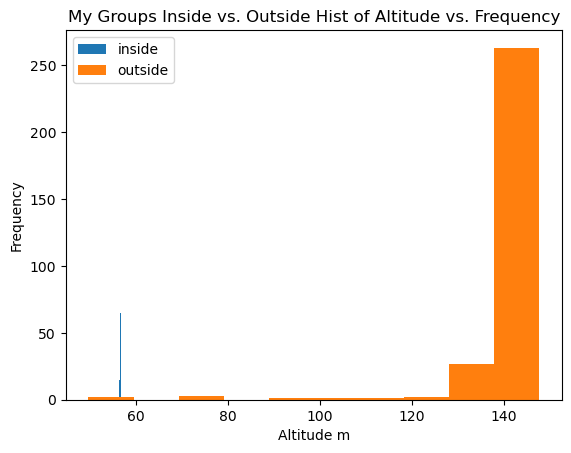

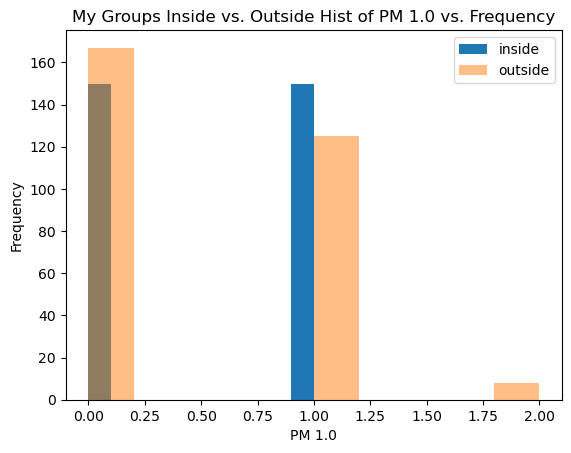

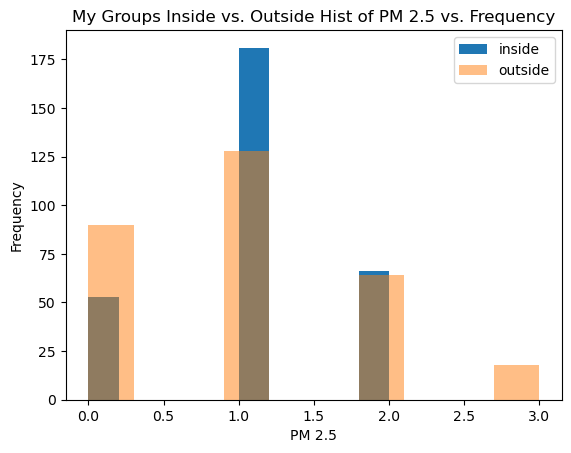

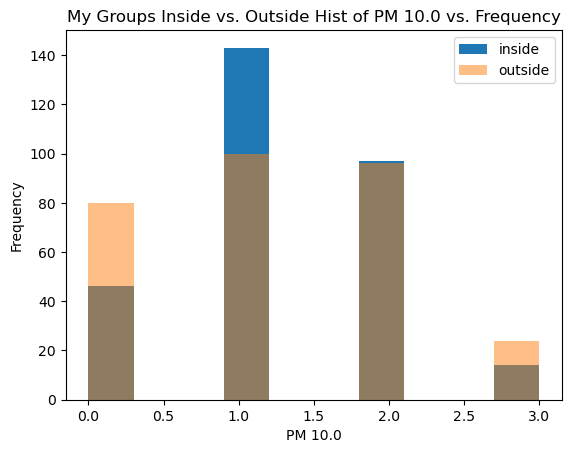

In [427]:
#My Group Temperature Data inside vs. outside

plt.hist(temp_myin["temperature"], label = "inside")
plt.hist(temp_myout["temperature"], bins = 20, label = "outside")

plt.ylabel('Frequency')
plt.xlabel('Temperature °C')
plt.title("My Groups Inside vs. Outside Hist of Temperature vs. Frequency")


plt.legend()
plt.show()

#My Group Gas Data inside vs. outside

plt.hist(gas_myin["gas"], label = "inside")
plt.hist(gas_myout["gas"], label = "outside")

plt.ylabel('Frequency')
plt.xlabel('VOC Gas')
plt.title("My Groups Inside vs. Outside Hist of VOC Gas vs. Frequency")

plt.legend()
plt.show()

#My Group Humidity Data inside vs. outside

plt.hist(humidity_myin["humidity"], label = "inside")
plt.hist(humidity_myout["humidity"], label = "outside")

plt.ylabel('Frequency')
plt.xlabel('Humidity %')
plt.title("My Groups Inside vs. Outside Hist of Humidity vs. Frequency")

plt.legend()
plt.show()


#My Group Pressure Data inside vs. outside

plt.hist(pressure_myin["pressure"], label = "inside")
plt.hist(pressure_myout["pressure"], label = "outside")

plt.ylabel('Frequency')
plt.xlabel('Pressure hPa')
plt.title("My Groups Inside vs. Outside Hist of Pressure vs. Frequency")

plt.legend()
plt.show()

#My Group Altitude Data inside vs. outside

plt.hist(altitude_myin["altitude"], label = "inside")
plt.hist(altitude_myout["altitude"], label = "outside")

plt.ylabel('Frequency')
plt.xlabel('Altitude m')
plt.title("My Groups Inside vs. Outside Hist of Altitude vs. Frequency")

plt.legend()
plt.show()

#My Group PM 1.0 Data inside vs. outside

plt.hist(pm1_myin["Concentration Units (Standard) PM 1.0"], label = "inside")
plt.hist(pm1_myout["Concentration Units (Standard) PM 1.0"], label = "outside", alpha=0.5)

plt.ylabel('Frequency')
plt.xlabel('PM 1.0')
plt.title("My Groups Inside vs. Outside Hist of PM 1.0 vs. Frequency")

plt.legend()
plt.show()

#My Group PM 2.5 Data inside vs. outside

plt.hist(pm2_myin["Concentration Units (Standard) PM 2.5"], label = "inside")
plt.hist(pm2_myout["Concentration Units (Standard) PM 2.5"], label = "outside", alpha=0.5)

plt.ylabel('Frequency')
plt.xlabel('PM 2.5')
plt.title("My Groups Inside vs. Outside Hist of PM 2.5 vs. Frequency")

plt.legend()
plt.show()


#My Group PM 10.0 Data inside vs. outside

plt.hist(pm10_myin["Concentration Units (Standard) PM 10.0"], label = "inside")
plt.hist(pm10_myout["Concentration Units (Standard) PM 10.0"], label = "outside", alpha=0.5)

plt.ylabel('Frequency')
plt.xlabel('PM 10.0')
plt.title("My Groups Inside vs. Outside Hist of PM 10.0 vs. Frequency")

plt.legend()
plt.show()

Overlaying Our Groups Histogram data for both Inside and Outside conditions we sometimes observe that the generated histograms are very skinny and/or small for inside data, while thick for outside data. This occurs because the inside data being overlayed goes over a much smaller domain than the outside data. The sample size is the same for each scenario, 300 readings, but in the case of Pressure vs. Frequency for example, the inside data's range was 0.066159 hPa while the outside data's range was 11.66316 hPa. This is why the inside pressure histogram looks so small when overlayed with the outside pressure histogram. What this tells us is that there was much more variation in the outside readings than in the inside readings for Pressure, Altitude, Humidity, and Pressure. This intuition makes sense: when taking our indoor data the sensors were held still in a non-exposed environment, while with the outdoor measurements, the sensors were moving and placed in environments subject to greater fluctuations in those variables.

In [428]:
myindata.describe()

,time,Concentration Units (Standard) PM 1.0,Concentration Units (Standard) PM 2.5,Concentration Units (Standard) PM 10.0,temperature,gas,pressure,humidity,altitude,Unnamed: 9
count,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,1.676678e+09,0.500000,1.043333,1.263333,22.680598,52721.303333,1006.457452,16.162533,56.706717,1.0
std,1.034165e+02,0.500835,0.629372,0.771994,0.104192,11435.722576,0.011967,0.173058,0.100173,0.0
min,1.676678e+09,0.000000,0.000000,0.000000,22.190742,8369.000000,1006.418684,15.900621,56.477419,1.0
25%,1.676678e+09,0.000000,1.000000,1.000000,22.638252,47063.750000,1006.448725,16.075176,56.640534,1.0
50%,1.676678e+09,0.500000,1.000000,1.000000,22.717207,55953.500000,1006.456368,16.128138,56.715787,1.0
75%,1.676678e+09,1.000000,1.000000,2.000000,22.758711,61681.750000,1006.465358,16.183109,56.779769,1.0
max,1.676678e+09,1.000000,2.000000,3.000000,22.772969,65672.000000,1006.484843,16.964390,57.031248,1.0


In [429]:
myoutdata.describe()

,time,Concentration Units (Standard) PM 1.0,Concentration Units (Standard) PM 2.5,Concentration Units (Standard) PM 10.0,temperature,gas,pressure,humidity,altitude,Unnamed: 9
count,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,1.677280e+09,0.470000,1.033333,1.213333,14.089473,61386.216667,996.647999,40.872861,139.154911,1.0
std,1.033485e+02,0.550858,0.868757,0.929535,2.518148,23624.521923,1.311181,6.176481,11.028760,0.0
min,1.677280e+09,0.000000,0.000000,0.000000,9.875312,1920.000000,995.627281,32.246999,49.735974,1.0
25%,1.677280e+09,0.000000,0.000000,0.000000,11.546699,46574.500000,996.345045,35.237894,139.468851,1.0
50%,1.677280e+09,0.000000,1.000000,1.000000,13.939277,65852.500000,996.422866,39.852592,141.048875,1.0
75%,1.677280e+09,1.000000,2.000000,2.000000,16.511104,81466.750000,996.610101,46.267637,141.705651,1.0
max,1.677280e+09,2.000000,3.000000,3.000000,17.987031,94283.000000,1007.290441,50.581947,147.765263,1.0


From .describe() of our groups inside and outside data, we notice that the standard deviation for our outside taken data is larger than that of our inside taken data, for all variables. The means vary as we might expect them to for inside and outside conditions: the mean for temperature is lower outside than it is inside, the mean for humidity is higher outside than it is inside, etc. Some of these means hint at errors in the sensors that put into question the reliability of the sensor. For example, on our groups outdoor sampling, the mean altitude was recorded to be 139 meters, when we were at no point even 117 meters above sea level. Additionally, for the indoor altitude sampling, the measurements seem inaccurate as well, considering Etcheverrry is at 113 meters above sea level and the readings state a mean altitude of 57 meters. Unless the basement level is 56 meters underground, these altitude readings do not reflect reality.

Remember that our uncertainty on the mean was equal to the total standard deviation divided by the root of the number of samples collected: 

In [430]:
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)  

def Text_gather_mean_uncertainty(dataframe):
    shape = dataframe.shape
    mean_uncertainty_list_forcolumn = []
    i = 0
    
    while i < shape[1]:
        stdtemp = np.std(dataframe.iloc[:,[i]])
        meanuncertain = (stdtemp)/(math.sqrt(300))
        
        if((float(stdtemp)/(math.sqrt(300)))==0):
            mean_uncertainty_list_forcolumn.append(100)
        
        else:
            mean_uncertainty_list_forcolumn.append(meanuncertain)
        i = i+1
        
    return mean_uncertainty_list_forcolumn


def gather_mean_uncertainty(dataframe):
    shape = dataframe.shape
    mean_uncertainty_list_forcolumn = []
    i = 0
    
    while i < shape[1]:
        stdtemp = np.std(dataframe.iloc[:,[i]])
        meanuncertain = float(stdtemp)/(math.sqrt(300))
        
        if((float(stdtemp)/(math.sqrt(300)))==0):
            mean_uncertainty_list_forcolumn.append(100)
        
        else:
            mean_uncertainty_list_forcolumn.append(meanuncertain)
        i = i+1
        
    return np.array(mean_uncertainty_list_forcolumn)

def stds_away_from_mean(dataframe1, dataframe2, uncertaintylist):
    
    shape1 = dataframe1.shape
    mean_list1 = []
    i = 0
    
    while i < shape1[1]:
        mean = float(np.mean(dataframe1.iloc[:,[i]], axis=0))
        mean_list1.append(mean)
        i = i+1
        
    shape2 = dataframe2.shape
    mean_list2 = []
    i=0
    
    while i < shape2[1]:
        mean = float(np.mean(dataframe2.iloc[:,[i]], axis=0))
        mean_list2.append(mean)
        i = i+1
        
    newlist = np.array(mean_list1)-np.array(mean_list2)
    newlist = abs(newlist)
    newlist = newlist/(uncertaintylist)
    return newlist
    
in_Mean_Uncertainty = (gather_mean_uncertainty(myindata))

print("***Note that the first and last value of the following printed text arrays should be ignored. The first value represents operations done on time column of the input dataframes, and the last value represents operations done on the last column of the input dataframe, which is a remnant from the CSV conversion\nprocess.")
print("")
print("-------------------------------------------------------------------")
print("The following is a list of the calculated mean uncertainties for our groups inside data: \n", (Text_gather_mean_uncertainty(myindata)))
print("-------------------------------------------------------------------")
# print("The following is a list of the calculated mean uncertainties for our groups outside data: \n", (Text_gather_mean_uncertainty(myindata)))
# print("-------------------------------------------------------------------")

junk_stds_away_from_mean = (stds_away_from_mean(myindata,myoutdata,in_Mean_Uncertainty))

#deleting junk data from list
how_many_stds_away_from_mean = np.delete(junk_stds_away_from_mean,[0,9])

labels = ["Concentration Units PM 1.0","Concentration Units PM 2.5","Concentration Units PM 10.0","Temperature","VOC Gas","Pressure","Humidity","Altitude"]
dfDict = {"My Groups Variables from Inside and Outside Data":labels, "How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?":how_many_stds_away_from_mean}
df = pd.DataFrame(dfDict)

df

***Note that the first and last value of the following printed text arrays should be ignored. The first value represents operations done on time column of the input dataframes, and the last value represents operations done on the last column of the input dataframe, which is a remnant from the CSV conversion
process.

-------------------------------------------------------------------
The following is a list of the calculated mean uncertainties for our groups inside data: 
 [time    5.960798
dtype: float64, Concentration Units (Standard) PM 1.0    0.028868
dtype: float64, Concentration Units (Standard) PM 2.5    0.036276
dtype: float64, Concentration Units (Standard) PM 10.0    0.044497
dtype: float64, temperature    0.006005
dtype: float64, gas    659.140429
dtype: float64, pressure    0.00069
dtype: float64, humidity    0.009975
dtype: float64, altitude    0.005774
dtype: float64, 100]
-------------------------------------------------------------------


,My Groups Variables from Inside and Outside Data,How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
0,Concentration Units PM 1.0,1.039230
1,Concentration Units PM 2.5,0.275663
2,Concentration Units PM 10.0,1.123677
3,Temperature,1430.544113
4,VOC Gas,13.145777
5,Pressure,14222.071912
6,Humidity,2477.258292
7,Altitude,14279.536141


https://www.investopedia.com/terms/c/central_limit_theorem.asp#:~:text=Key%20Takeaways-,The%20central%20limit%20theorem%20(CLT)%20states%20that%20the%20distribution%20of,for%20the%20CLT%20to%20hold states that only around 30 samples are needed for the CLT to hold. Our data sets took many more than 30 samples, so those variables which do not follow a Gaussian closely or at all (in the case of Gas in both indoor and outdoor collections) do not follow to CLT because they might be collecting data from multiple different underlying sources. They also might indicate a problem or uniqueness in the sensor collecting the data.

In [431]:
temp_otherout = otheroutdata.iloc[:,[1,2]]
gas_otherout = otheroutdata.iloc[:,[1,3]]
humidity_otherout = otheroutdata.iloc[:,[1,4]]
pressure_otherout = otheroutdata.iloc[:,[1,5]]
altitude_otherout = otheroutdata.iloc[:,[1,6]]
pm1_otherout = otheroutdata.iloc[:,[1,7]]
pm2_otherout = otheroutdata.iloc[:,[1,8]]
pm10_otherout = otheroutdata.iloc[:,[1,9]]

temp_otherin = otherindata.iloc[:,[1,2]]
gas_otherin = otherindata.iloc[:,[1,3]]
humidity_otherin = otherindata.iloc[:,[1,4]]
pressure_otherin = otherindata.iloc[:,[1,5]]
altitude_otherin = otherindata.iloc[:,[1,6]]
pm1_otherin = otherindata.iloc[:,[1,7]]
pm2_otherin = otherindata.iloc[:,[1,8]]
pm10_otherin = otherindata.iloc[:,[1,9]]

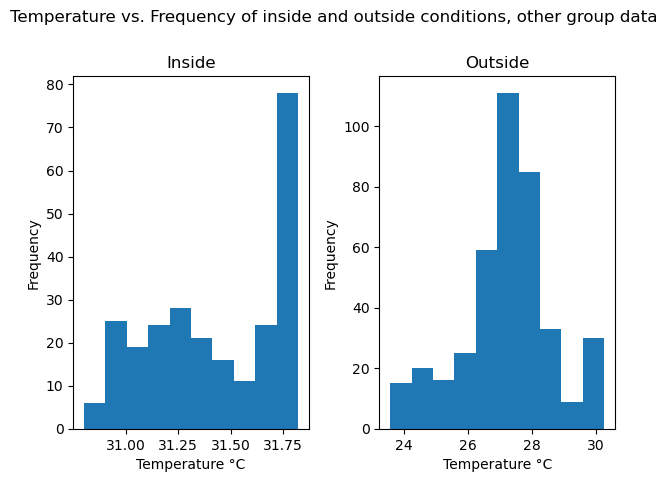

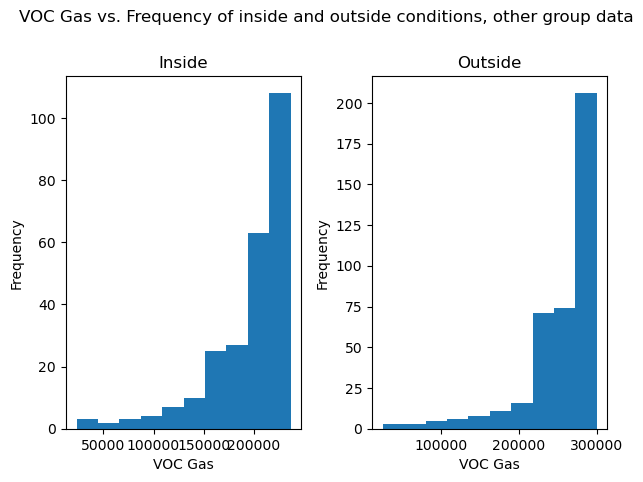

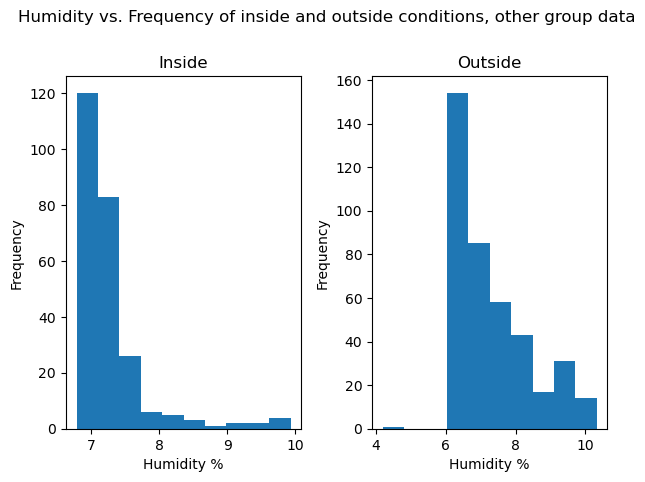

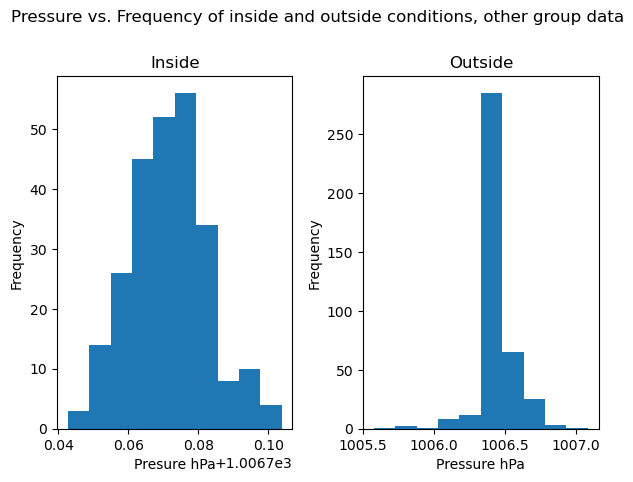

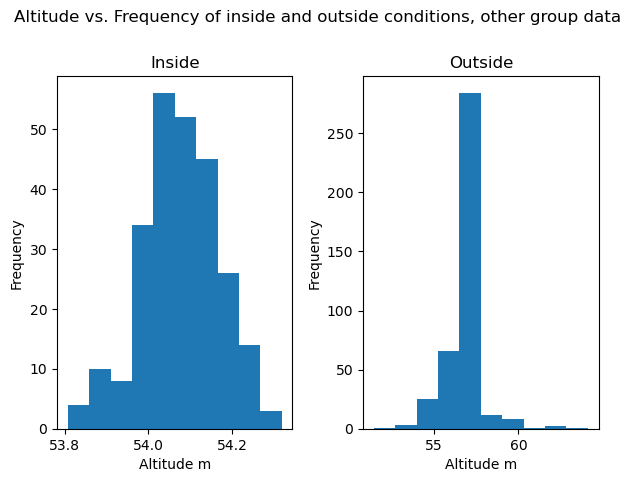

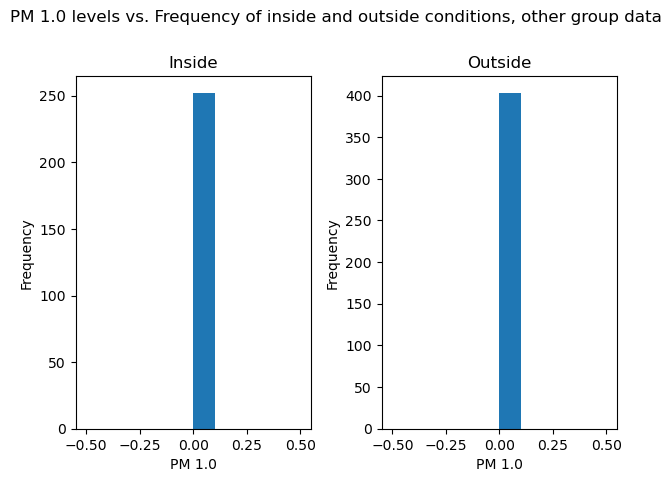

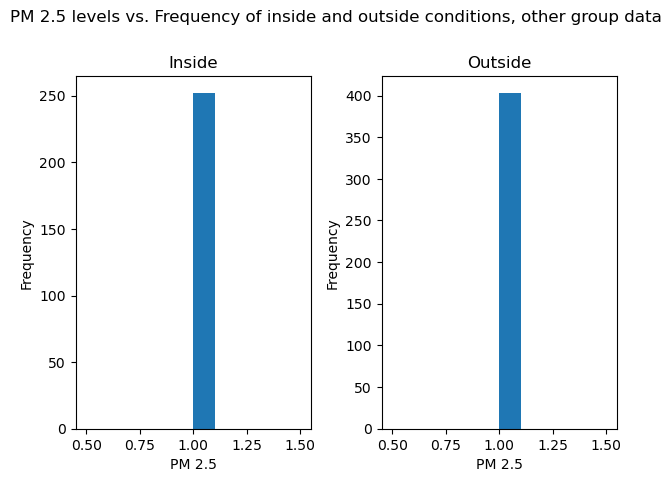

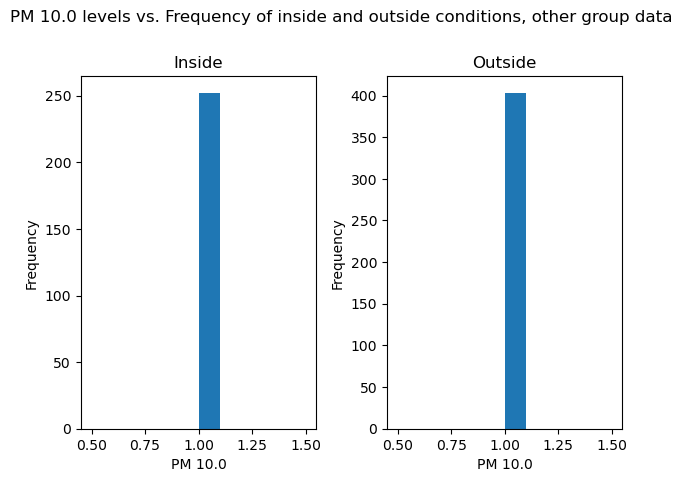

In [432]:
#Other Groups Temperature Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Temperature vs. Frequency of inside and outside conditions, other group data')
fig.tight_layout(pad = 2)

ax1.hist(temp_otherin["temp"])
ax2.hist(temp_otherout["temp"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('Temperature °C')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('Temperature °C')
ax2.set_ylabel('Frequency') 

plt.show()

#Other Groups Gas Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('VOC Gas vs. Frequency of inside and outside conditions, other group data')
fig.tight_layout(pad = 2)

ax1.hist(gas_otherin["gas"])
ax2.hist(gas_otherout["gas"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('VOC Gas')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('VOC Gas')
ax2.set_ylabel('Frequency') 

plt.show()

#Other Groups Humidity Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Humidity vs. Frequency of inside and outside conditions, other group data')
fig.tight_layout(pad = 2)

ax1.hist(humidity_otherin["humidity"])
ax2.hist(humidity_otherout["humidity"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('Humidity %')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('Humidity %')
ax2.set_ylabel('Frequency') 

plt.show()

#Other Groups Pressure Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Pressure vs. Frequency of inside and outside conditions, other group data')
fig.tight_layout(pad = 2)

ax1.hist(pressure_otherin["pressure"])
ax2.hist(pressure_otherout["pressure"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('Presure hPa')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('Pressure hPa')
ax2.set_ylabel('Frequency') 

plt.show()

#Other Groups Altitude Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Altitude vs. Frequency of inside and outside conditions, other group data')
fig.tight_layout(pad = 2)

ax1.hist(altitude_otherin["altitude"])
ax2.hist(altitude_otherout["altitude"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('Altitude m')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('Altitude m')
ax2.set_ylabel('Frequency') 

plt.show()

#Other Groups PM 1.0 Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PM 1.0 levels vs. Frequency of inside and outside conditions, other group data')
fig.tight_layout(pad = 2)

ax1.hist(pm1_otherin["PM 1.0"])
ax2.hist(pm1_otherout["PM 1.0"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('PM 1.0')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('PM 1.0')
ax2.set_ylabel('Frequency') 

plt.show()

#Other Groups PM 2.5 Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PM 2.5 levels vs. Frequency of inside and outside conditions, other group data')
fig.tight_layout(pad = 2)

ax1.hist(pm2_otherin["PM 2.5"])
ax2.hist(pm2_otherout["PM 2.5"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('PM 2.5')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('PM 2.5')
ax2.set_ylabel('Frequency') 

plt.show()

#Other Groups PM 10.0 Data

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PM 10.0 levels vs. Frequency of inside and outside conditions, other group data')
fig.tight_layout(pad = 2)

ax1.hist(pm10_otherin["PM10"])
ax2.hist(pm10_otherout["PM10"])

ax1.set_title("Inside")
ax2.set_title("Outside")

ax1.set_xlabel('PM 10.0')
ax1.set_ylabel('Frequency') 

ax2.set_xlabel('PM 10.0')
ax2.set_ylabel('Frequency') 

plt.show()

In [433]:
otherindata.describe()

,Unnamed: 0,time,temp,gas,humidity,pressure,altitude,PM 1.0,PM 2.5,PM10
count,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.0,252.0,252.0
mean,125.500000,1.676679e+09,31.429795,196815.083333,7.254070,1006.771460,54.078436,0.0,1.0,1.0
std,72.890329,8.682269e+01,0.309319,40888.186733,0.560854,0.011128,0.093131,0.0,0.0,0.0
min,0.000000,1.676678e+09,30.802266,23205.000000,6.787203,1006.742724,53.807074,0.0,1.0,1.0
25%,62.750000,1.676679e+09,31.176582,183774.000000,6.890436,1006.763730,54.020268,0.0,1.0,1.0
50%,125.500000,1.676679e+09,31.451582,210468.000000,7.153018,1006.771383,54.079078,0.0,1.0,1.0
75%,188.250000,1.676679e+09,31.752461,226100.500000,7.353035,1006.778411,54.143130,0.0,1.0,1.0
max,251.000000,1.676679e+09,31.821602,236917.000000,9.928704,1006.803885,54.318931,0.0,1.0,1.0


In [434]:
otheroutdata.describe()

,Unnamed: 0,time,temp,gas,humidity,pressure,altitude,PM 1.0,PM 2.5,PM10
count,403.000000,4.030000e+02,403.000000,403.000000,403.000000,403.000000,403.000000,403.0,403.0,403.0
mean,201.000000,1.676680e+09,27.214737,255484.444169,7.291489,1006.460745,56.679197,0.0,1.0,1.0
std,116.480327,1.387403e+02,1.411581,48830.140172,1.095782,0.123989,1.038009,0.0,0.0,0.0
min,0.000000,1.676680e+09,23.564180,24467.000000,4.199937,1005.574754,51.461486,0.0,1.0,1.0
25%,100.500000,1.676680e+09,26.568184,240263.000000,6.345118,1006.438147,56.531901,0.0,1.0,1.0
50%,201.000000,1.676680e+09,27.320039,274330.000000,6.962840,1006.455075,56.726613,0.0,1.0,1.0
75%,301.500000,1.676680e+09,28.066621,289278.500000,7.926243,1006.478335,56.868319,0.0,1.0,1.0
max,402.000000,1.676680e+09,30.247773,300138.000000,10.322244,1007.084194,64.098535,0.0,1.0,1.0


In [435]:
myindata.describe()

,time,Concentration Units (Standard) PM 1.0,Concentration Units (Standard) PM 2.5,Concentration Units (Standard) PM 10.0,temperature,gas,pressure,humidity,altitude,Unnamed: 9
count,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,1.676678e+09,0.500000,1.043333,1.263333,22.680598,52721.303333,1006.457452,16.162533,56.706717,1.0
std,1.034165e+02,0.500835,0.629372,0.771994,0.104192,11435.722576,0.011967,0.173058,0.100173,0.0
min,1.676678e+09,0.000000,0.000000,0.000000,22.190742,8369.000000,1006.418684,15.900621,56.477419,1.0
25%,1.676678e+09,0.000000,1.000000,1.000000,22.638252,47063.750000,1006.448725,16.075176,56.640534,1.0
50%,1.676678e+09,0.500000,1.000000,1.000000,22.717207,55953.500000,1006.456368,16.128138,56.715787,1.0
75%,1.676678e+09,1.000000,1.000000,2.000000,22.758711,61681.750000,1006.465358,16.183109,56.779769,1.0
max,1.676678e+09,1.000000,2.000000,3.000000,22.772969,65672.000000,1006.484843,16.964390,57.031248,1.0


In [436]:
print(otherindata)

     Unnamed: 0          time       temp     gas  humidity     pressure  \
0             0  1.676678e+09  30.802266  129708  7.740557  1006.795362   
1             1  1.676678e+09  30.821016   23205  7.698012  1006.791962   
2             2  1.676679e+09  30.877852   32992  7.646905  1006.782700   
3             3  1.676679e+09  30.928828   42786  7.586103  1006.779938   
4             4  1.676679e+09  30.974141   52109  7.534725  1006.776880   
..          ...           ...        ...     ...       ...          ...   
247         247  1.676679e+09  31.763008  235237  6.815597  1006.757019   
248         248  1.676679e+09  31.763594  233089  6.815610  1006.765095   
249         249  1.676679e+09  31.764766  235237  6.810886  1006.766993   
250         250  1.676679e+09  31.766328  234241  6.806170  1006.764178   
251         251  1.676679e+09  31.767891  236917  6.796704  1006.768491   

      altitude  PM 1.0  PM 2.5  PM10  
0    53.878403       0       1     1  
1    53.906860       

We see that the other groups data are of differing lengths to ours and to their own, so we will cut all the data down to the first 252 entries to more accurately compare histograms

In [437]:
temp_myout = myoutdata.iloc[0:252,[0,4]]
gas_myout = myoutdata.iloc[0:252,[0,5]]
humidity_myout = myoutdata.iloc[0:252:,[0,7]]
pressure_myout = myoutdata.iloc[0:252,[0,6]]
altitude_myout = myoutdata.iloc[0:252,[0,8]]
pm1_myout = myoutdata.iloc[0:252,[0,1]]
pm2_myout = myoutdata.iloc[0:252,[0,2]]
pm10_myout = myoutdata.iloc[0:252,[0,3]]


temp_myin = myindata.iloc[0:252,[0,4]]
gas_myin = myindata.iloc[0:252,[0,5]]
humidity_myin = myindata.iloc[0:252,[0,7]]
pressure_myin = myindata.iloc[0:252,[0,6]]
altitude_myin = myindata.iloc[0:252,[0,8]]
pm1_myin = myindata.iloc[0:252,[0,1]]
pm2_myin = myindata.iloc[0:252,[0,2]]
pm10_myin = myindata.iloc[0:252,[0,3]]

temp_otherout = otheroutdata.iloc[0:252,[1,2]]
gas_otherout = otheroutdata.iloc[0:252,[1,3]]
humidity_otherout = otheroutdata.iloc[0:252,[1,4]]
pressure_otherout = otheroutdata.iloc[0:252,[1,5]]
altitude_otherout = otheroutdata.iloc[0:252,[1,6]]
pm1_otherout = otheroutdata.iloc[0:252,[1,7]]
pm2_otherout = otheroutdata.iloc[0:252,[1,8]]
pm10_otherout = otheroutdata.iloc[0:252,[1,9]]

temp_otherin = otherindata.iloc[:,[1,2]]
gas_otherin = otherindata.iloc[:,[1,3]]
humidity_otherin = otherindata.iloc[:,[1,4]]
pressure_otherin = otherindata.iloc[:,[1,5]]
altitude_otherin = otherindata.iloc[:,[1,6]]
pm1_otherin = otherindata.iloc[:,[1,7]]
pm2_otherin = otherindata.iloc[:,[1,8]]
pm10_otherin = otherindata.iloc[:,[1,9]]


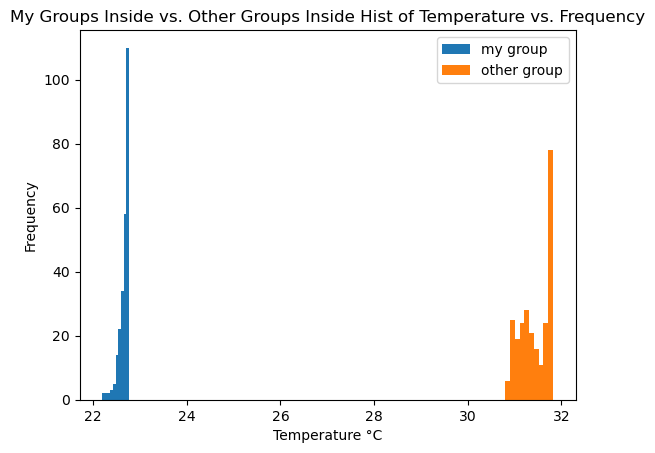

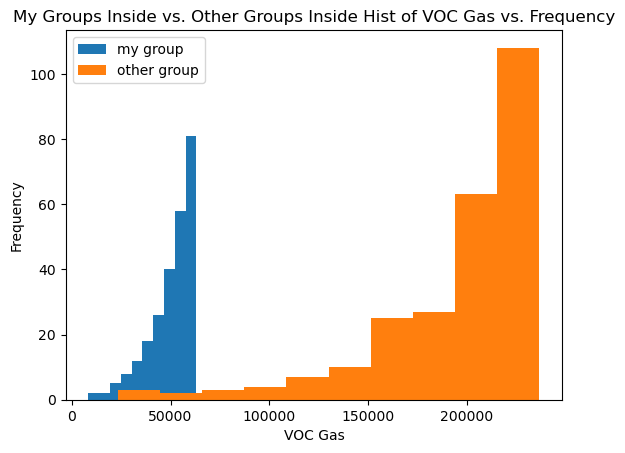

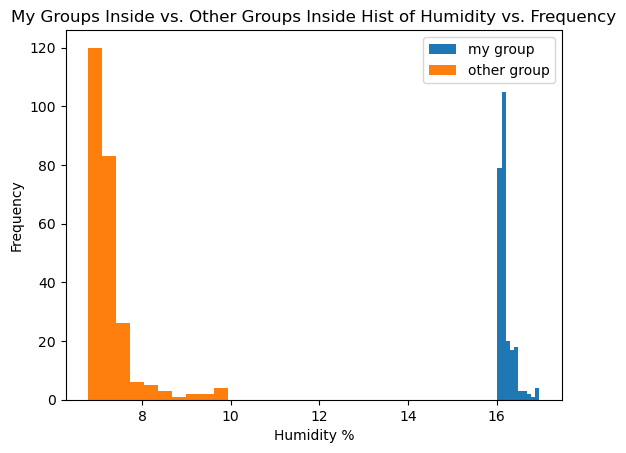

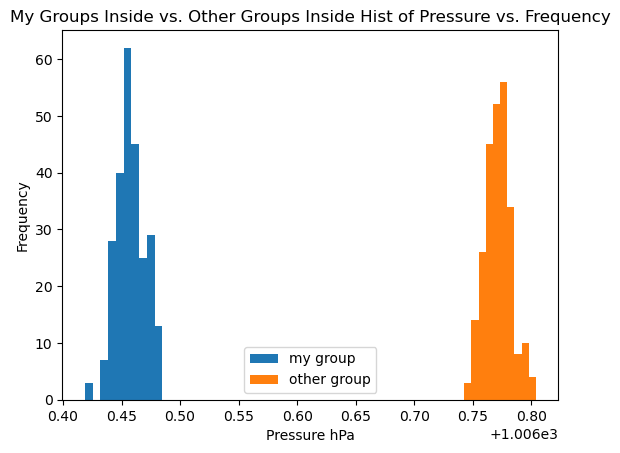

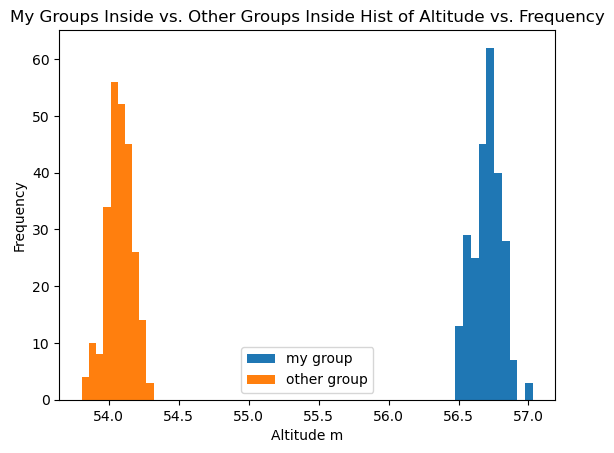

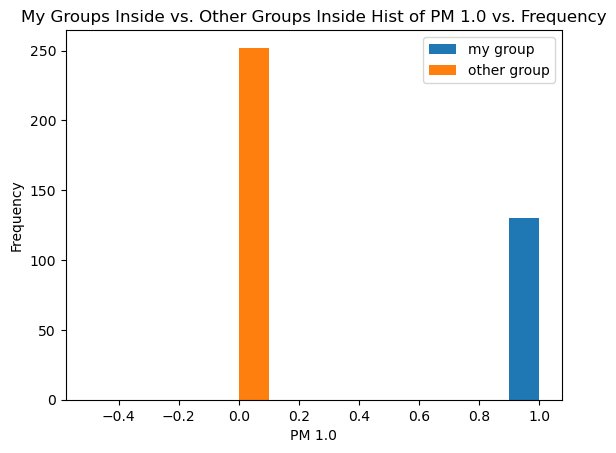

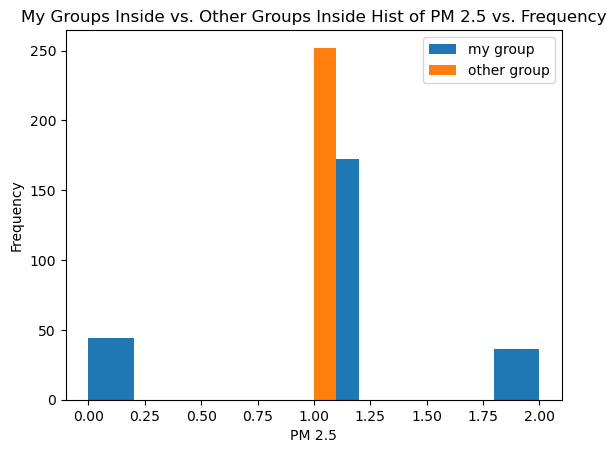

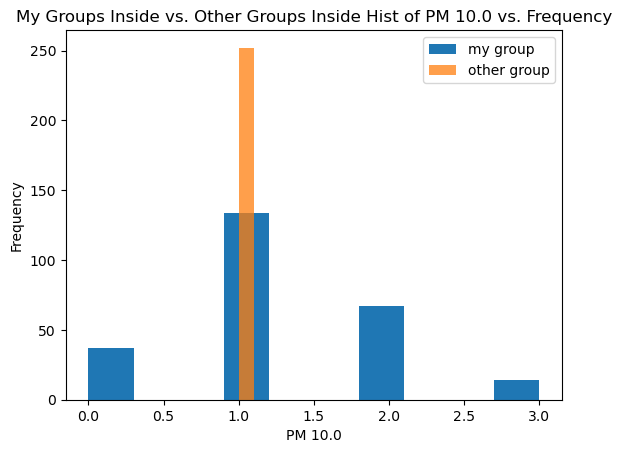

In [438]:
#Here we will plot histograms from our groups inside data vs the other groups inside data against each of the variables measured by the sensors

#My Group vs Other Group Indoor Temperature Data

plt.hist(temp_myin["temperature"], label = "my group")
plt.hist(temp_otherin["temp"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('Temperature °C')
plt.title("My Groups Inside vs. Other Groups Inside Hist of Temperature vs. Frequency")


plt.legend()
plt.show()

#My Group vs Other Group Indoor Gas Data

plt.hist(gas_myin["gas"], label = "my group")
plt.hist(gas_otherin["gas"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('VOC Gas')
plt.title("My Groups Inside vs. Other Groups Inside Hist of VOC Gas vs. Frequency")

plt.legend()
plt.show()

#My Group vs Other Group Indoor Humidity Data

plt.hist(humidity_myin["humidity"], label = "my group")
plt.hist(humidity_otherin["humidity"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('Humidity %')
plt.title("My Groups Inside vs. Other Groups Inside Hist of Humidity vs. Frequency")

plt.legend()
plt.show()


#My Group vs Other Group Indoor Pressure Data

plt.hist(pressure_myin["pressure"], label = "my group")
plt.hist(pressure_otherin["pressure"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('Pressure hPa')
plt.title("My Groups Inside vs. Other Groups Inside Hist of Pressure vs. Frequency")

plt.legend()
plt.show()

#My Group vs Other Group Indoor Altitude Data

plt.hist(altitude_myin["altitude"], label = "my group")
plt.hist(altitude_otherin["altitude"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('Altitude m')
plt.title("My Groups Inside vs. Other Groups Inside Hist of Altitude vs. Frequency")

plt.legend()
plt.show()

#My Group vs Other Group Indoor PM 1.0 Data

plt.hist(pm1_myin["Concentration Units (Standard) PM 1.0"], label = "my group")
plt.hist(pm1_otherin["PM 1.0"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('PM 1.0')
plt.title("My Groups Inside vs. Other Groups Inside Hist of PM 1.0 vs. Frequency")

plt.legend()
plt.show()

#My Group vs Other Group Indoor PM 2.5 Data

plt.hist(pm2_myin["Concentration Units (Standard) PM 2.5"], label = "my group")
plt.hist(pm2_otherin["PM 2.5"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('PM 2.5')
plt.title("My Groups Inside vs. Other Groups Inside Hist of PM 2.5 vs. Frequency")

plt.legend()
plt.show()


#My Group vs Other Group Indoor PM 10.0 Data

plt.hist(pm10_myin["Concentration Units (Standard) PM 10.0"], label = "my group")
plt.hist(pm10_otherin["PM10"], label = "other group", alpha = 0.75)

plt.ylabel('Frequency')
plt.xlabel('PM 10.0')
plt.title("My Groups Inside vs. Other Groups Inside Hist of PM 10.0 vs. Frequency")

plt.legend()
plt.show()


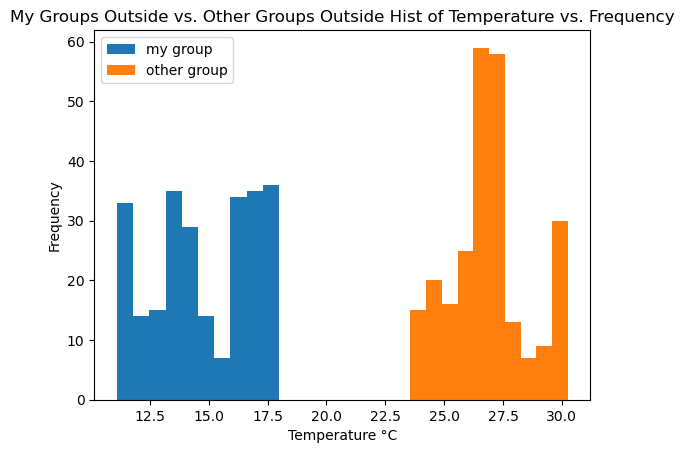

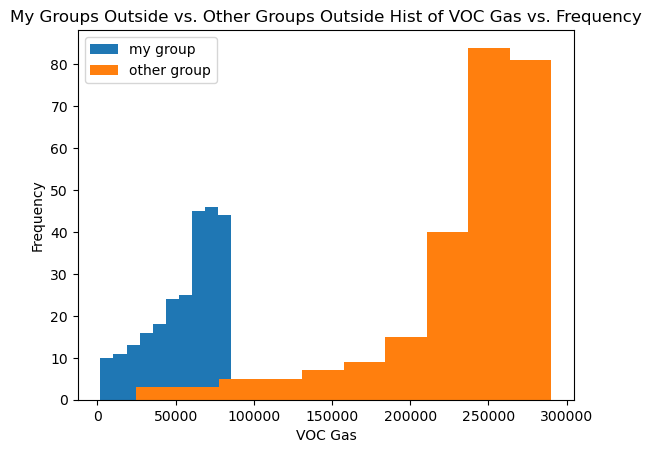

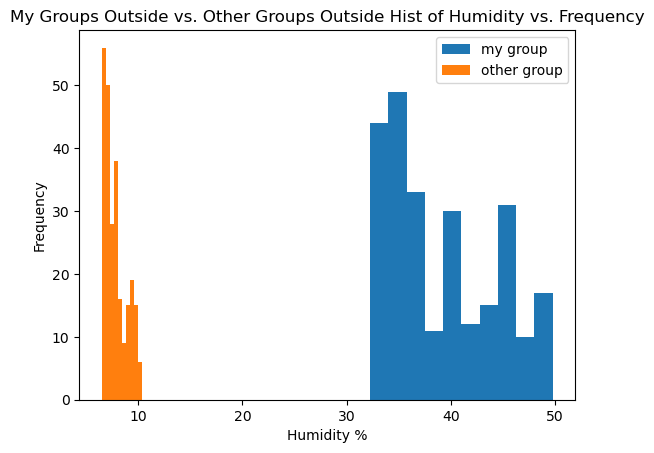

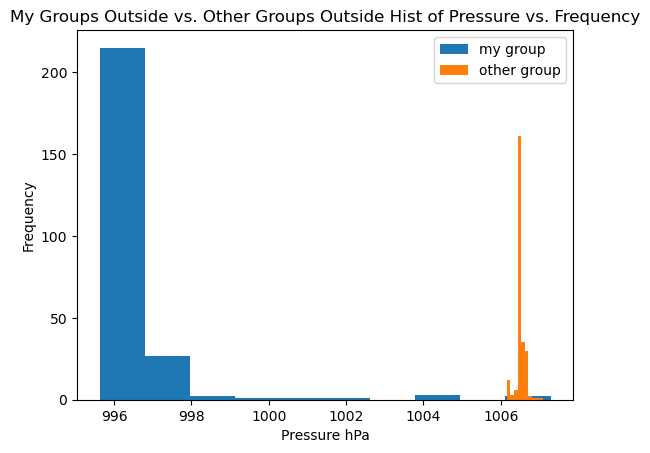

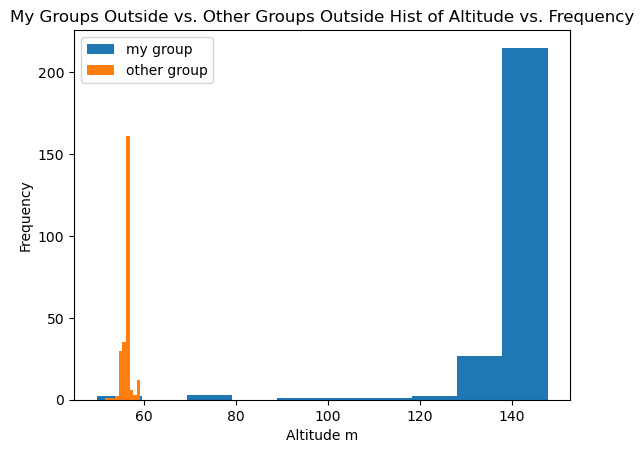

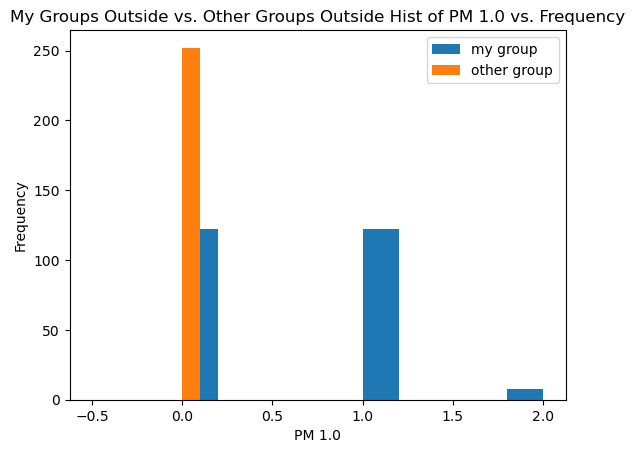

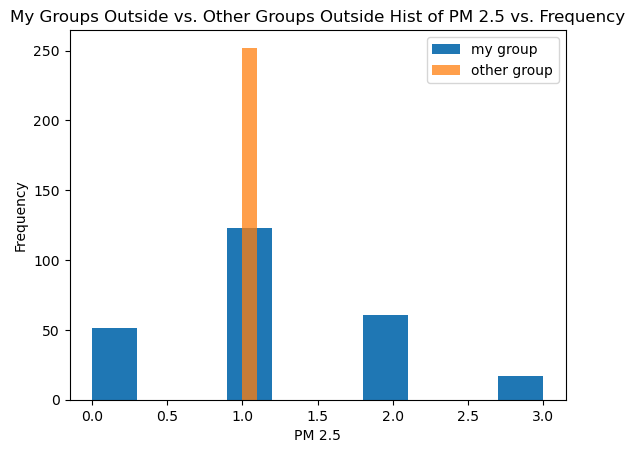

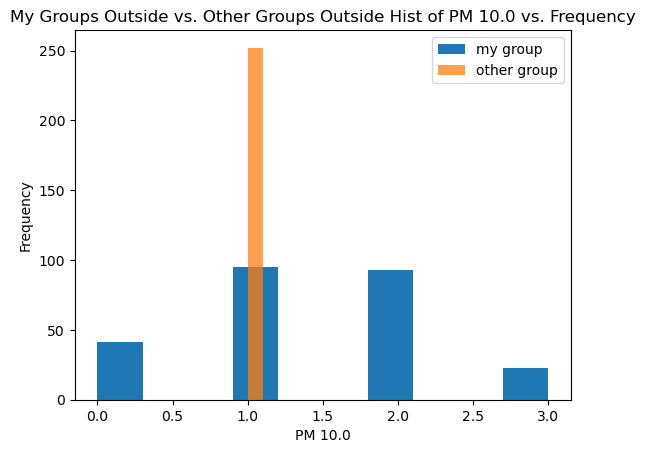

In [439]:
#Here we will plot histograms from our groups inside data vs the other groups inside data against each of the variables measured by the sensors

#My Group Outside vs Other Group Outside Temperature Data

plt.hist(temp_myout["temperature"], label = "my group")
plt.hist(temp_otherout["temp"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('Temperature °C')
plt.title("My Groups Outside vs. Other Groups Outside Hist of Temperature vs. Frequency")


plt.legend()
plt.show()

#My Group Outside vs Other Group Outside Gas Data

plt.hist(gas_myout["gas"], label = "my group")
plt.hist(gas_otherout["gas"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('VOC Gas')
plt.title("My Groups Outside vs. Other Groups Outside Hist of VOC Gas vs. Frequency")

plt.legend()
plt.show()

#My Group Outside vs Other Group Outside Humidity Data

plt.hist(humidity_myout["humidity"], label = "my group")
plt.hist(humidity_otherout["humidity"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('Humidity %')
plt.title("My Groups Outside vs. Other Groups Outside Hist of Humidity vs. Frequency")

plt.legend()
plt.show()


#My Group Outside vs Other Group Outside Pressure Data

plt.hist(pressure_myout["pressure"], label = "my group")
plt.hist(pressure_otherout["pressure"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('Pressure hPa')
plt.title("My Groups Outside vs. Other Groups Outside Hist of Pressure vs. Frequency")

plt.legend()
plt.show()

#My Group Outside vs Other Group Outside Altitude Data

plt.hist(altitude_myout["altitude"], label = "my group")
plt.hist(altitude_otherout["altitude"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('Altitude m')
plt.title("My Groups Outside vs. Other Groups Outside Hist of Altitude vs. Frequency")

plt.legend()
plt.show()

#My Group Outside vs Other Group Outside PM 1.0 Data

plt.hist(pm1_myout["Concentration Units (Standard) PM 1.0"], label = "my group")
plt.hist(pm1_otherout["PM 1.0"], label = "other group")

plt.ylabel('Frequency')
plt.xlabel('PM 1.0')
plt.title("My Groups Outside vs. Other Groups Outside Hist of PM 1.0 vs. Frequency")

plt.legend()
plt.show()

#My Group Outside vs Other Group Outside PM 2.5 Data

plt.hist(pm2_myout["Concentration Units (Standard) PM 2.5"], label = "my group")
plt.hist(pm2_otherout["PM 2.5"], label = "other group", alpha = 0.75)

plt.ylabel('Frequency')
plt.xlabel('PM 2.5')
plt.title("My Groups Outside vs. Other Groups Outside Hist of PM 2.5 vs. Frequency")

plt.legend()
plt.show()


#My Group vs Other Group Indoor PM 10.0 Data

plt.hist(pm10_myout["Concentration Units (Standard) PM 10.0"], label = "my group")
plt.hist(pm10_otherout["PM10"], label = "other group", alpha = 0.75)

plt.ylabel('Frequency')
plt.xlabel('PM 10.0')
plt.title("My Groups Outside vs. Other Groups Outside Hist of PM 10.0 vs. Frequency")

plt.legend()
plt.show()


In [440]:

# # WE WILL now gather the mean stds for each variable from the first 252 readings of my groups inside data. We will divide the difference between each variable mean from the other groups indoor data to our indoor data, dividing by the previously calculated uncertainties to find how many stds away the other indoor groups data sets mean is from our indoors group data set mean.

trim_myindata = myindata.iloc[0:252,:]

#arranging columns in correct order so we can compare data using the functions I created above
otherindata = otherindata[['time','PM 1.0','PM 2.5','PM10','temp', 'gas','pressure','humidity','altitude','Unnamed: 0']]

in_mean_uncertainty = (gather_mean_uncertainty(trim_myindata))

print(Text_gather_mean_uncertainty(trim_myindata))

#We will be cutting out the usual time and CSV remnants from junk_stds_away, but we will also cut out PM concentration data, as the other group measured 0 variance in this data
junk_stds_away = stds_away_from_mean(trim_myindata, otherindata, in_mean_uncertainty)
how_many_stds_away = np.delete(junk_stds_away,[0,1,2,3,9])

labels = ["Temperature","VOC Gas","Pressure","Humidity","Altitude"]
dfDict = {"My Groups' Variables from Inside and Outside Data":labels, "How many inside mean standard deviations (1 sigma uncertainty) are my groups inside and the other groups inside measurements separated by?":how_many_stds_away}
df = pd.DataFrame(dfDict)

df

[time    5.007154
dtype: float64, Concentration Units (Standard) PM 1.0    0.028853
dtype: float64, Concentration Units (Standard) PM 2.5    0.032478
dtype: float64, Concentration Units (Standard) PM 10.0    0.044043
dtype: float64, temperature    0.006091
dtype: float64, gas    642.273516
dtype: float64, pressure    0.000699
dtype: float64, humidity    0.009568
dtype: float64, altitude    0.005848
dtype: float64, 100]


,My Groups' Variables from Inside and Outside Data,How many inside mean standard deviations (1 sigma uncertainty) are my groups inside and the other groups inside measurements separated by?
0,Temperature,1439.072042
1,VOC Gas,227.834645
2,Pressure,449.283594
3,Humidity,934.680134
4,Altitude,449.226852


Notice for this data comparison we've removed the data for the PM concentrations. This is because all air quality values collected in the other groups inside data were constant, that is, no variation was recorded. Because of that, we have no information about the variance of that data, which signals that the equipment is not as sensitive as required to detect the underlying air quality Guassians's and/or the other group's air quality sensor was inaccurate to the point that real differences in air quality that should have been recorded by the sensor were erroneously categorized or ignored.

Notice that, taking ONLY the above data frame into concern, all of the variable measurements are very unlikely to be detecting from the same underlying Guassian. 

We know this to be false, as both samples were taken from the same room under very similar conditions, and so THAT big of a difference in the underlying data is very unlikely. The more likely scenario is that either our sensor or the other groups sensor is imprecise, and as such, our data is actually measuring similar underlying Guassians, but is being "shifted" to one direction or the other by the sensor. We can elucidate this by the fact that the number of standard deviations some of our means are seperated by, such as that between Pressure and Altitude, are very similar; ~449.2 for both. This points to a consistent shift in the data of some of our detectors. Further evidence is shown in the histograms of our group vs the other groups variables, specifically Altitude, Pressure, Humidity and Temperature. They are very similarly shaped between our group and the other groups indoor data, just shifted one way or the other. All of this points to the idea that one or both sensors are imprecise, and any sort of observed variation that we have observed in the histograms and calulated in the above table can be chalked up to imprecision in the measurements rather than any fundamental difference between the underlying Gaussian distribution of each variable.

In [441]:

# # WE WILL now gather the mean stds for each variable from the first 252 readings of my groups OUTSIDE data. We will find the difference for each variable mean between the other groups outdoor data to our outdoor data, dividing by the previously calculated uncertainties to find how many stds away the other outdoor groups data is from our outdoors group data

trim_myoutdata = myoutdata.iloc[0:252,:]
trim_otheroutdata = otheroutdata.iloc[0:252,:]

trim_otheroutdata = trim_otheroutdata[['time','PM 1.0','PM 2.5','PM10','temp', 'gas','pressure','humidity','altitude','Unnamed: 0']]

out_mean_uncertainty = (gather_mean_uncertainty(trim_myoutdata))

print("The following is a list of the calculated mean uncertainties from the first 252 readings of our groups inside data:")
print(Text_gather_mean_uncertainty(trim_myoutdata))

#We will be cutting out the usual time and CSV remnants from junk_stds_away, but we will also cut out PM concentration data, as the other group measured 0 variance in this data
junk_stds_away = stds_away_from_mean(trim_myoutdata, otheroutdata, out_mean_uncertainty)
how_many_stds_away = np.delete(junk_stds_away,[0,1,2,3,9])

labels = ["Temperature","VOC Gas","Pressure","Humidity","Altitude"]
dfDict = {"My Groups Variables from Inside and Outside Data":labels, "How many inside mean standard deviations (1 sigma uncertainty) are my groups inside and the other groups inside measurements separated by?":how_many_stds_away}
df = pd.DataFrame(dfDict)

df

The following is a list of the calculated mean uncertainties from the first 252 readings of our groups inside data:
[time    5.003843
dtype: float64, Concentration Units (Standard) PM 1.0    0.032209
dtype: float64, Concentration Units (Standard) PM 2.5    0.047742
dtype: float64, Concentration Units (Standard) PM 10.0    0.049853
dtype: float64, temperature    0.124764
dtype: float64, gas    1258.238854
dtype: float64, pressure    0.082312
dtype: float64, humidity    0.299216
dtype: float64, altitude    0.692354
dtype: float64, 100]


,My Groups Variables from Inside and Outside Data,How many inside mean standard deviations (1 sigma uncertainty) are my groups inside and the other groups inside measurements separated by?
0,Temperature,59.879717
1,VOC Gas,43.648461
2,Pressure,11419.941660
3,Humidity,130.871414
4,Altitude,199.172544


Extra:

In [442]:
tempvshumidity_data = {"Humidity %":humidity_myout["humidity"].tolist(), "Temperature °C":temp_myout["temperature"].tolist()}

tempvshumiditydf = pd.DataFrame(tempvshumidity_data)
tempvshumiditydf

,Humidity %,Temperature °C
0,34.115785,17.225703
1,33.953819,17.219062
2,33.827560,17.173945
3,33.767445,17.121797
4,33.645723,17.062812
...,...,...
247,49.786172,11.119063
248,49.786412,11.121211
249,49.767465,11.115352
250,49.718016,11.109297


Text(0.5, 1.0, 'Temperature vs. Humidity for Our Groups Outdoor Data')

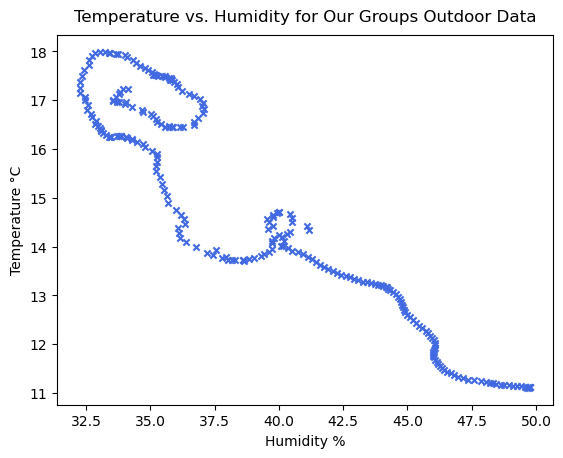

In [443]:
tempvshumiditydf.plot.scatter(x="Humidity %", y="Temperature °C", marker='x', color='royalblue')
plt.title("Temperature vs. Humidity for Our Groups Outdoor Data", pad = 10)

When comparing data coming from different sensors but taken at the same time, the correlation coefficient is a variable that lets us tell if a data set is correlated in a way such that a line of best fit with a very specific slope can be placed to most accurately reflect the relationship. As such, a correlation coefficient of 0 or very near 0 indicates that a line of any slope can be drawn through the data, and can all be equally as accurate in qualifying the data

As we can see from the above plot, temperature and humidity seem to be correlated, as a lower humidity % usually corresponds to a higher temperature in °C.

Text(0.5, 1.0, 'Temperature vs. VOC Gas for Our Groups Outdoor Data')

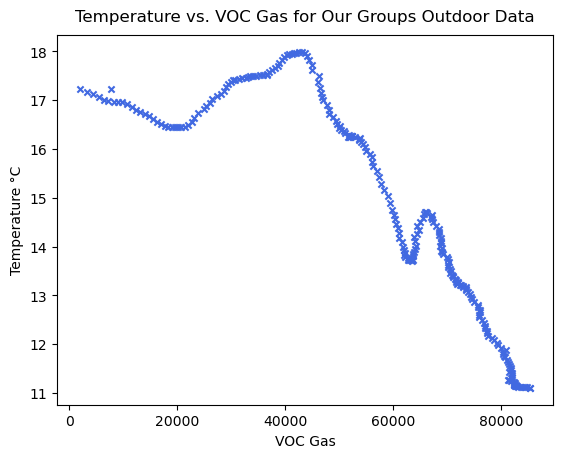

In [444]:
tempvsgas_data = {"VOC Gas":gas_myout["gas"].tolist(), "Temperature °C":temp_myout["temperature"].tolist()}

tempvsgasdf = pd.DataFrame(tempvsgas_data)
tempvsgasdf

tempvsgasdf.plot.scatter(x="VOC Gas", y="Temperature °C", marker='x', color='royalblue')
plt.title("Temperature vs. VOC Gas for Our Groups Outdoor Data", pad = 10)

Text(0.5, 1.0, 'Temperature vs. Pressure for Our Groups Outdoor Data')

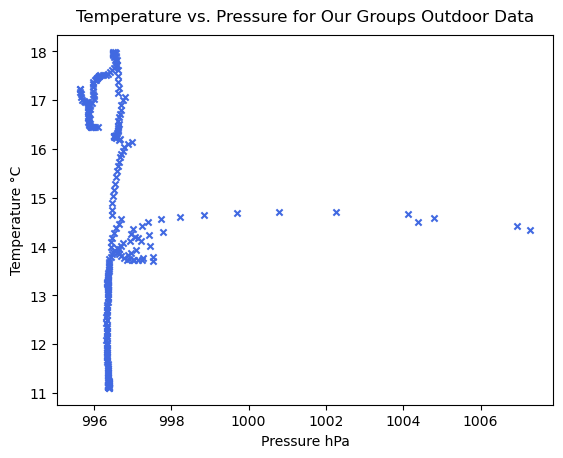

In [445]:
tempvspressure_data = {"Pressure hPa":pressure_myout["pressure"].tolist(), "Temperature °C":temp_myout["temperature"].tolist()}

tempvspressuredf = pd.DataFrame(tempvspressure_data)
tempvspressuredf

tempvspressuredf.plot.scatter(x="Pressure hPa", y="Temperature °C", marker='x', color='royalblue')
plt.title("Temperature vs. Pressure for Our Groups Outdoor Data", pad = 10)

From the plots Temperature vs Pressure and Temperature vs. Altitude we determine that there is not correlation observed in our data set, as the line of best fit on this data is ambiguous. 

Even though our scatter plot depicts no correlation between temperature and altitude, we know this not to be true. In real life, the higher altitude you go to, the colder it gets, and thermodynaimcs states that ideal gases follow PV=nRT. We know that in real life temperature and these two variables are correlated, so why isn't that depicted in our data sets? The most likely answer is that there was simply not enough variation in our data to measure these correlations. That is, temperature and altitude are related, but on a large scale. Dealing with small changes in the tens of meter (as was experienced in our data sets) doesn't provide enough information to show the intuitive correlation. The same goes for the relationship between atmospheric pressure and temperature, which are related, but are also subject to nearly random and wide-scale climate forces. Of course then, the controlled-laboratory predicted relationship between temperature and pressure is unlikely to be observed in such a short time-frame, with such limited equipment, in outdoor conditions.

This shows that although our data predicts no correlation, more measurements are required to reveal the observed correlations between variables; Likewise just because correlations are observed in data sets does not mean that these correlations reflect reality, as more data in different conditions and over longer spans of time are required to confidently say if one variable is in reality correlated to another.

It's interesting that our Temp vs. Pressure data is a reflection of our Temp vs. Altitude data. Maybe this points to the fact that both of these variables wre collected by the same sensor.

Text(0.5, 1.0, 'Temperature vs. Altitude for Our Groups Outdoor Data')

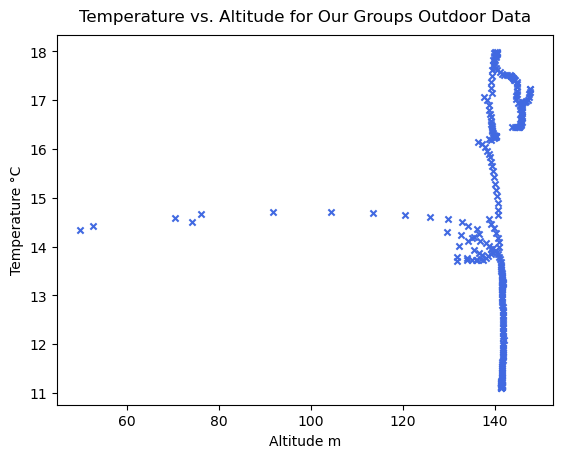

In [446]:
tempvsaltitude_data = {"Altitude m":altitude_myout["altitude"].tolist(), "Temperature °C":temp_myout["temperature"].tolist()}

tempvsaltitudedf = pd.DataFrame(tempvsaltitude_data)
tempvsaltitudedf

tempvsaltitudedf.plot.scatter(x="Altitude m", y="Temperature °C", marker='x', color='royalblue')
plt.title("Temperature vs. Altitude for Our Groups Outdoor Data", pad = 10)

Text(0.5, 1.0, 'Temperature vs. PM 2.5 for Our Groups Outdoor Data')

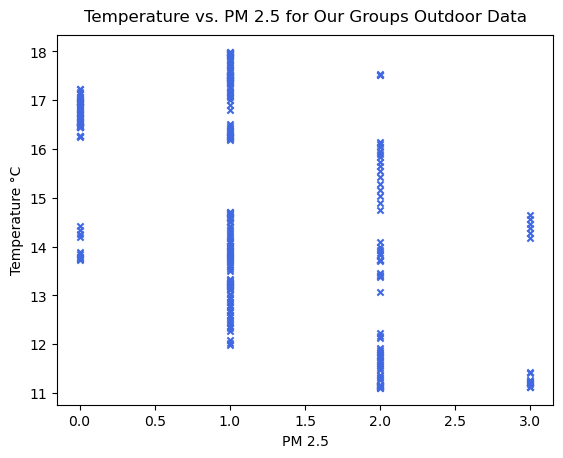

In [447]:
tempvspm2_data = {"PM 2.5":pm2_myout["Concentration Units (Standard) PM 2.5"].tolist(), "Temperature °C":temp_myout["temperature"].tolist()}

tempvspm2df = pd.DataFrame(tempvspm2_data)
tempvspm2df

tempvspm2df.plot.scatter(x="PM 2.5", y="Temperature °C", marker='x', color='royalblue')
plt.title("Temperature vs. PM 2.5 for Our Groups Outdoor Data", pad = 10)

Unlike the plot of Temperature vs. Humidity, the scatter plot of Temperature vs. PM 2.5 does not display any discernale relationship, and so the two variables are most likely not correlated. I predict that their correlation coefficient will be 0 if not very close to 0.

Text(0.5, 1.0, 'Temperature vs. PM 1.0 for Our Groups Outdoor Data')

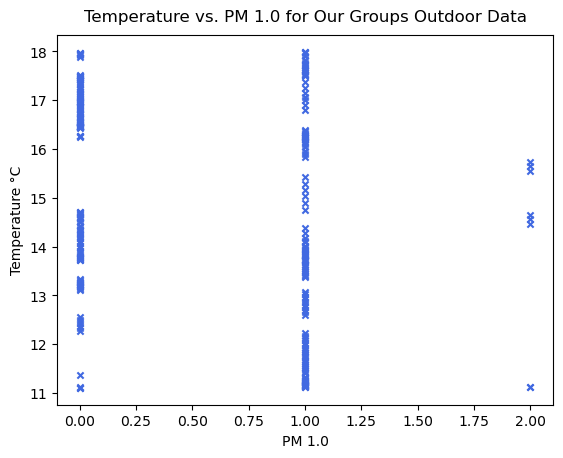

In [448]:
tempvspm1_data = {"PM 1.0":pm1_myout["Concentration Units (Standard) PM 1.0"].tolist(), "Temperature °C":temp_myout["temperature"].tolist()}

tempvspm1df = pd.DataFrame(tempvspm1_data)
tempvspm1df

tempvspm1df.plot.scatter(x="PM 1.0", y="Temperature °C", marker='x', color='royalblue')
plt.title("Temperature vs. PM 1.0 for Our Groups Outdoor Data", pad = 10)

Text(0.5, 1.0, 'Temperature vs. PM 10.0 for Our Groups Outdoor Data')

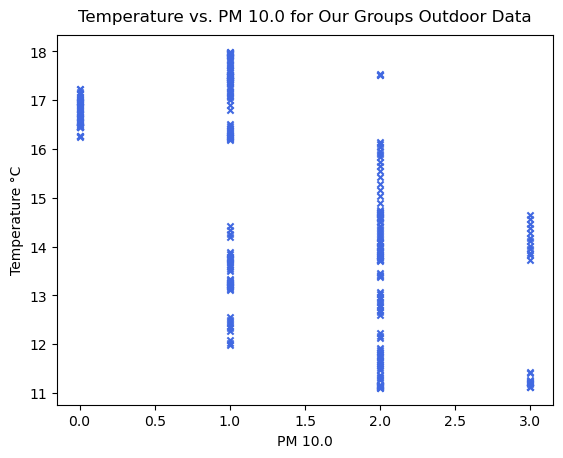

In [449]:
tempvspm10_data = {"PM 10.0":pm10_myout["Concentration Units (Standard) PM 10.0"].tolist(), "Temperature °C":temp_myout["temperature"].tolist()}

tempvspm10df = pd.DataFrame(tempvspm10_data)
tempvspm10df

tempvspm10df.plot.scatter(x="PM 10.0", y="Temperature °C", marker='x', color='royalblue')
plt.title("Temperature vs. PM 10.0 for Our Groups Outdoor Data", pad = 10)